Fuzzy Set A: {'x1': 0.2, 'x2': 0.7, 'x3': 0.5}
Fuzzy Set B: {'x1': 0.6, 'x2': 0.4, 'x3': 0.9}

Union (A ∪ B): {'x1': 0.6, 'x2': 0.7, 'x3': 0.9}

Intersection (A ∩ B): {'x1': 0.2, 'x2': 0.4, 'x3': 0.5}

Complement (A'): {'x1': 0.8, 'x2': 0.30000000000000004, 'x3': 0.5}

Difference (A - B): {'x1': 0.2, 'x2': 0.6, 'x3': 0.09999999999999998}


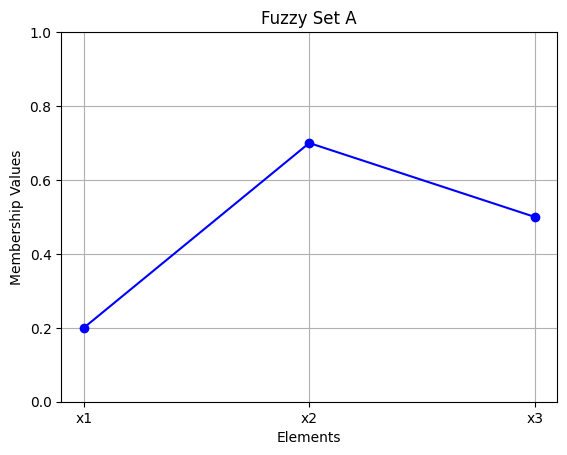

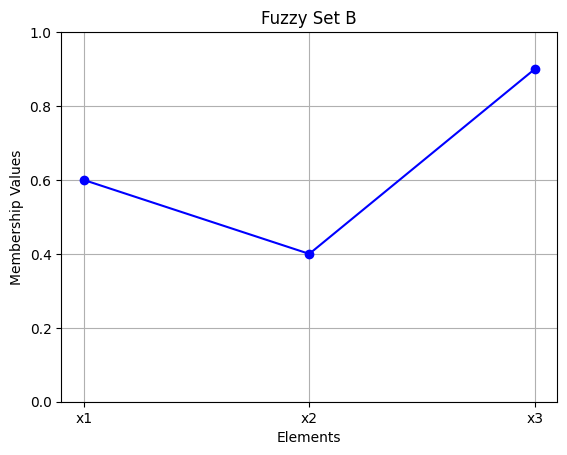

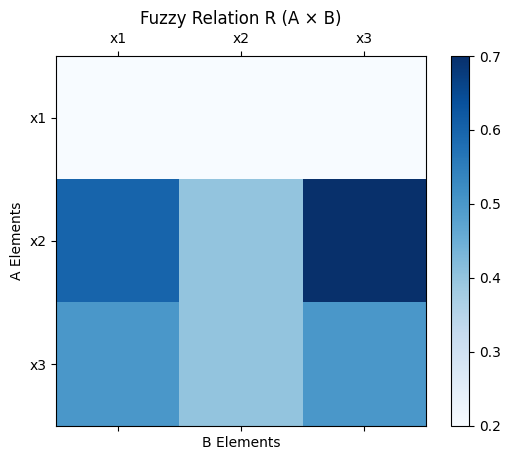

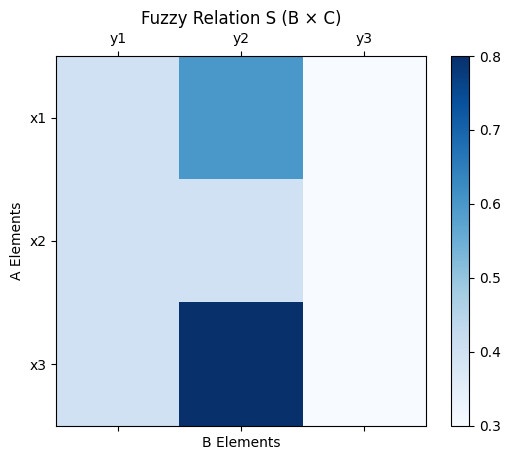

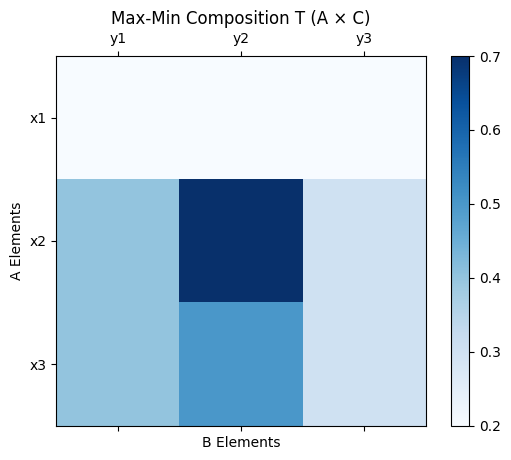

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy sets as dictionaries
A = {'x1': 0.2, 'x2': 0.7, 'x3': 0.5}
B = {'x1': 0.6, 'x2': 0.4, 'x3': 0.9}

# Ensure both sets have the same universe
universe = list(A.keys())

# Union: max(A(x), B(x))
def fuzzy_union(A, B):
    return {x: max(A[x], B[x]) for x in universe}

# Intersection: min(A(x), B(x))
def fuzzy_intersection(A, B):
    return {x: min(A[x], B[x]) for x in universe}

# Complement: 1 - A(x)
def fuzzy_complement(A):
    return {x: 1 - A[x] for x in A}

# Difference: min(A(x), 1 - B(x))
def fuzzy_difference(A, B):
    return {x: min(A[x], 1 - B[x]) for x in universe}

# Cartesian Product to create fuzzy relation
def cartesian_product(A, B):
    relation = {}
    for a_key, a_val in A.items():
        for b_key, b_val in B.items():
            relation[(a_key, b_key)] = min(a_val, b_val)
    return relation

# Max-Min Composition of two fuzzy relations
def max_min_composition(R1, R2, X, Y, Z):
    result = {}
    for x in X:
        for z in Z:
            min_values = [min(R1[(x, y)], R2[(y, z)]) for y in Y]
            result[(x, z)] = max(min_values)
    return result

# ------------------- Run the code -------------------

def plot_fuzzy_set(A, title="Fuzzy Set", xlabel="Elements", ylabel="Membership Value"):
    elements = list(A.keys())
    membership_values = list(A.values())

    plt.plot(elements, membership_values, marker='o', linestyle='-', color='b', label='Membership Function')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

def plot_fuzzy_relation(relation, A, B, title="Fuzzy Relation"):
    matrix = np.array([[relation.get((a, b), 0) for b in B] for a in A])

    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap="Blues")
    fig.colorbar(cax)

    ax.set_xticks(range(len(B)))
    ax.set_xticklabels(B)
    ax.set_yticks(range(len(A)))
    ax.set_yticklabels(A)

    ax.set_title(title)
    ax.set_xlabel('B Elements')
    ax.set_ylabel('A Elements')

    plt.show()

# Parameters
print("Fuzzy Set A:", A)
print("Fuzzy Set B:", B)

# Fuzzy operations
union = fuzzy_union(A, B)
print("\nUnion (A ∪ B):", union)

intersection = fuzzy_intersection(A, B)
print("\nIntersection (A ∩ B):", intersection)

complement_A = fuzzy_complement(A)
print("\nComplement (A'):", complement_A)

difference = fuzzy_difference(A, B)
print("\nDifference (A - B):", difference)

# Plot fuzzy sets
plot_fuzzy_set(A, title="Fuzzy Set A", xlabel="Elements", ylabel="Membership Values")
plot_fuzzy_set(B, title="Fuzzy Set B", xlabel="Elements", ylabel="Membership Values")

# Create fuzzy relation R(A×B) and S(B×C)
C = {'y1': 0.4, 'y2': 0.8, 'y3': 0.3}
R = cartesian_product(A, B)   # R(A×B)
S = cartesian_product(B, C)   # S(B×C)

# Plot fuzzy relations
plot_fuzzy_relation(R, A, B, title="Fuzzy Relation R (A × B)")
plot_fuzzy_relation(S, B, C, title="Fuzzy Relation S (B × C)")

# Max-Min composition of R(A×B) and S(B×C) → T(A×C)
T = max_min_composition(R, S, A, B, C)

# Plot composition result
plot_fuzzy_relation(T, A, C, title="Max-Min Composition T (A × C)")
